In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=84407bbfebb9d11425a3ac01865b334d97e1fcc0fbdeee8825551ee60facc39d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
pip install gdown

In [3]:
import gdown

In [4]:
data_path = 'https://drive.google.com/uc?id='
data_file_id = '1i9s4gLqKw19gknr3BVW5L_5PbaOg-_Bj'
output_name = 'data.zip'

In [5]:
gdown.download(data_path+data_file_id, output_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1i9s4gLqKw19gknr3BVW5L_5PbaOg-_Bj
To: /content/data.zip
100%|██████████| 134k/134k [00:00<00:00, 22.1MB/s]


'data.zip'

In [6]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [7]:
import os
if not os.path.exists('result'):
  os.makedirs('result')

In [8]:
import numpy as np
import pandas as pd

In [9]:
pd_wine_data = pd.read_csv('data/train.csv')

In [10]:
pd_wine_data.head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
5,6,6.0,0.33,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,white,6
6,7,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white,6
7,8,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,red,6
8,9,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.0,white,5
9,10,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,red,7


In [11]:
pd_wine_data.shape

(3231, 14)

In [12]:
pd_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [13]:
pd_wine_data_desc = pd_wine_data.describe()
print(pd_wine_data_desc)

                id  fixed acidity  ...      alcohol      quality
count  3231.000000    3231.000000  ...  3231.000000  3231.000000
mean   1616.000000       7.205772  ...    10.497108     5.829155
std     932.853686       1.295494  ...     1.193813     0.850003
min       1.000000       3.800000  ...     8.400000     4.000000
25%     808.500000       6.400000  ...     9.500000     5.000000
50%    1616.000000       7.000000  ...    10.300000     6.000000
75%    2423.500000       7.700000  ...    11.300000     6.000000
max    3231.000000      15.900000  ...    14.900000     8.000000

[8 rows x 13 columns]


In [48]:
print(pd_wine_data_desc['quality'])

count    3231.000000
mean        5.829155
std         0.850003
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [14]:
pd_wine_data['type'].unique()

array(['white', 'red'], dtype=object)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

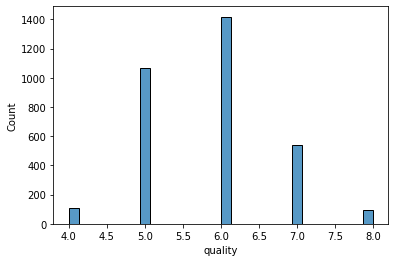

In [54]:
sns.histplot(pd_wine_data['quality'])

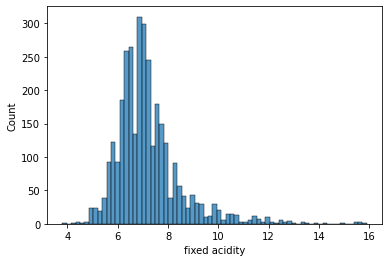

In [17]:
sns.histplot(pd_wine_data['fixed acidity'])

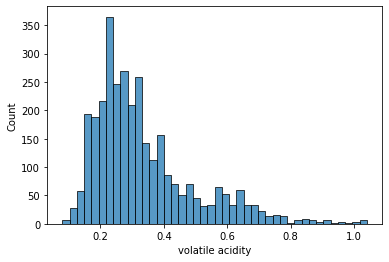

In [18]:
sns.histplot(pd_wine_data['volatile acidity'])

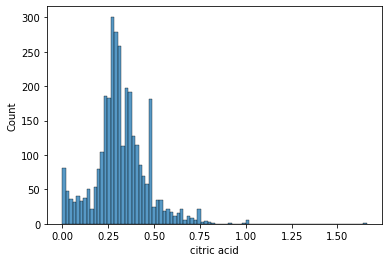

In [19]:
sns.histplot(pd_wine_data['citric acid'])

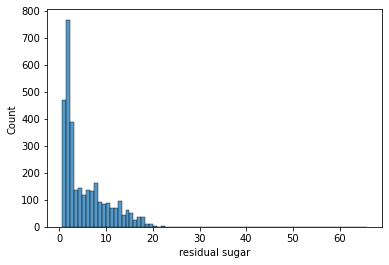

In [20]:
sns.histplot(pd_wine_data['residual sugar'])

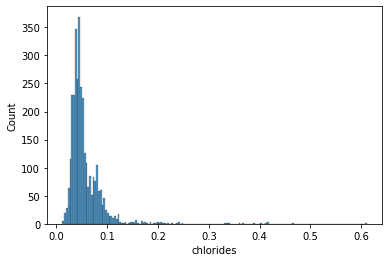

In [21]:
sns.histplot(pd_wine_data['chlorides'])

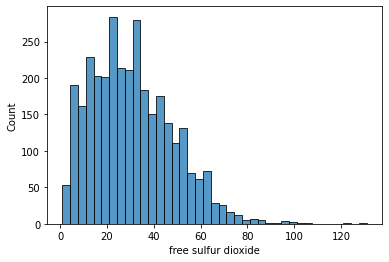

In [22]:
sns.histplot(pd_wine_data['free sulfur dioxide'])

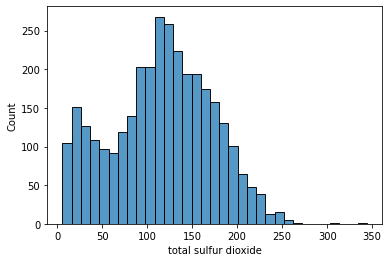

In [23]:
sns.histplot(pd_wine_data['total sulfur dioxide'])

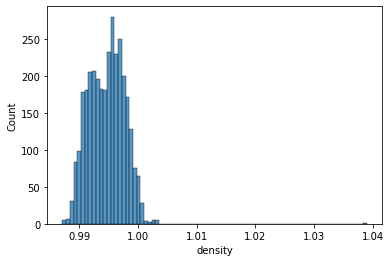

In [24]:
sns.histplot(pd_wine_data['density'])

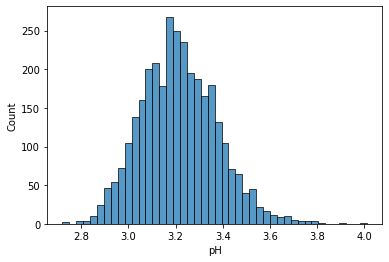

In [25]:
sns.histplot(pd_wine_data['pH'])

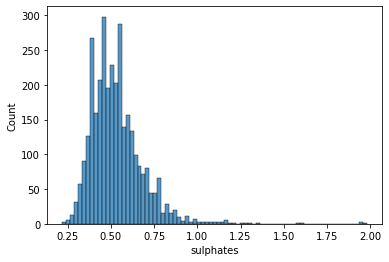

In [26]:
sns.histplot(pd_wine_data['sulphates'])

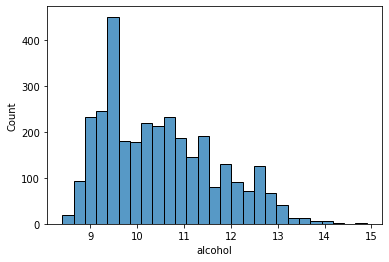

In [27]:
sns.histplot(pd_wine_data['alcohol'])

In [28]:
total_corr = pd_wine_data.corr()

In [29]:
total_corr

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,1.000000,0.018970,0.006596,0.011222,-0.037193,-0.018822,-0.000888,-0.012760,-0.021715,-0.010712,-0.031720,-0.000821,-0.011903
fixed acidity,0.018970,1.000000,0.232630,0.322810,-0.103202,0.293142,-0.280763,-0.321019,0.455402,-0.262493,0.287222,-0.095422,-0.081833
volatile acidity,0.006596,0.232630,1.000000,-0.345733,-0.188803,0.364315,-0.361046,-0.412550,0.279816,0.241005,0.250557,-0.044734,-0.255084
citric acid,0.011222,0.322810,-0.345733,1.000000,0.143676,0.065396,0.136252,0.179739,0.112365,-0.303586,0.055739,-0.013053,0.066630
residual sugar,-0.037193,-0.103202,-0.188803,0.143676,1.000000,-0.124167,0.400449,0.486119,0.567618,-0.260946,-0.175722,-0.352132,-0.045225
chlorides,-0.018822,0.293142,0.364315,0.065396,-0.124167,1.000000,-0.190749,-0.276137,0.352764,0.034020,0.398705,-0.262646,-0.185623
free sulfur dioxide,-0.000888,-0.280763,-0.361046,0.136252,0.400449,-0.190749,1.000000,0.721963,0.024838,-0.138593,-0.193609,-0.180137,0.068432
total sulfur dioxide,-0.012760,-0.321019,-0.412550,0.179739,0.486119,-0.276137,0.721963,1.000000,0.045679,-0.218352,-0.266420,-0.268022,-0.043504
density,-0.021715,0.455402,0.279816,0.112365,0.567618,0.352764,0.024838,0.045679,1.000000,0.001155,0.253116,-0.677935,-0.309164
pH,-0.010712,-0.262493,0.241005,-0.303586,-0.260946,0.034020,-0.138593,-0.218352,0.001155,1.000000,0.189430,0.121912,0.036293


In [30]:
pd_wine_data[pd_wine_data.columns[1:]].corr()['quality'][:-1]

fixed acidity          -0.081833
volatile acidity       -0.255084
citric acid             0.066630
residual sugar         -0.045225
chlorides              -0.185623
free sulfur dioxide     0.068432
total sulfur dioxide   -0.043504
density                -0.309164
pH                      0.036293
sulphates               0.026895
alcohol                 0.451999
Name: quality, dtype: float64

In [31]:
columns_name = pd_wine_data.columns
columns_name = columns_name[1:]
columns_name = columns_name[:-2]
print(columns_name)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [32]:
sort_quality = np.sort(pd_wine_data['quality'].unique())
print(sort_quality)

[4 5 6 7 8]


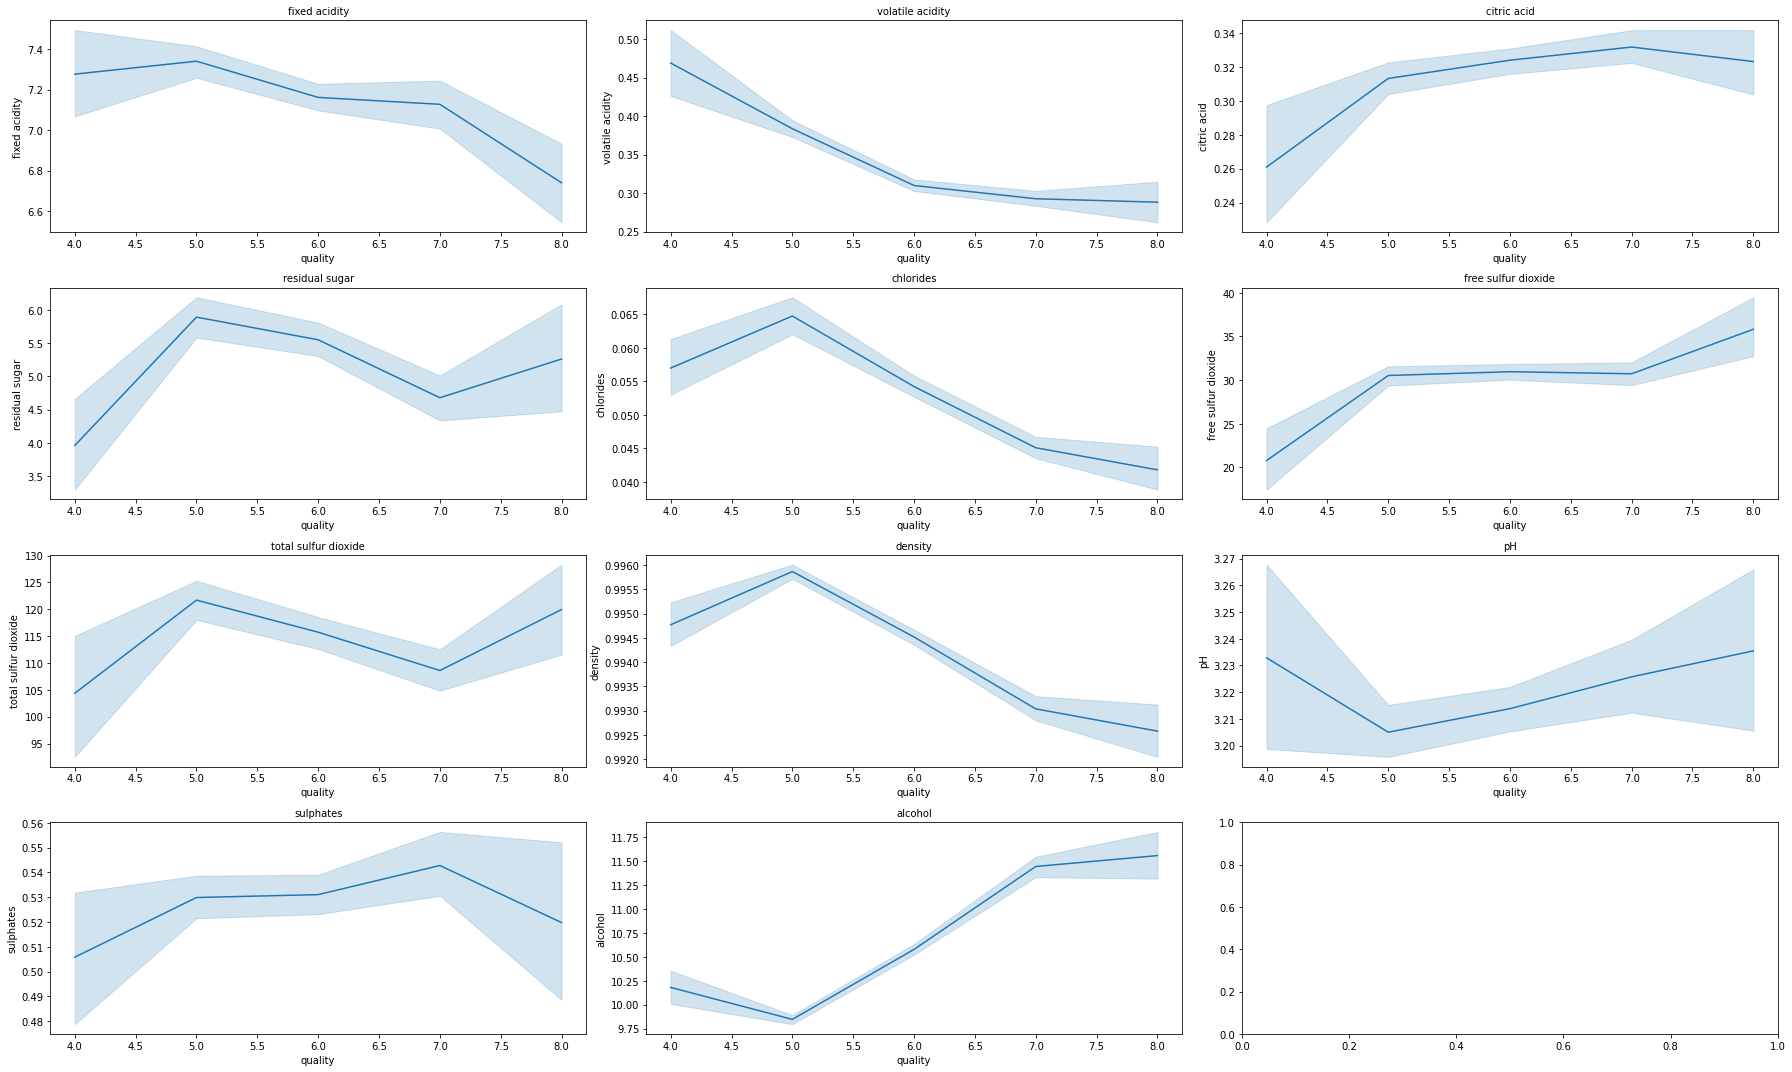

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

for view_ax, view_col in zip(axes.flat, columns_name):
    sns.lineplot(data=pd_wine_data, x='quality', y=view_col, ax=view_ax)
    view_ax.set_title(view_col, fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
for ax, col in zip(axes.flat, ['1', '2', '3', '4', '5']):
  print(ax, col)

AxesSubplot(0.0300278,0.781204;0.297475x0.195833) 1
AxesSubplot(0.361072,0.781204;0.297475x0.195833) 2
AxesSubplot(0.692116,0.781204;0.297475x0.195833) 3
AxesSubplot(0.0300278,0.533704;0.297475x0.195833) 4
AxesSubplot(0.361072,0.533704;0.297475x0.195833) 5


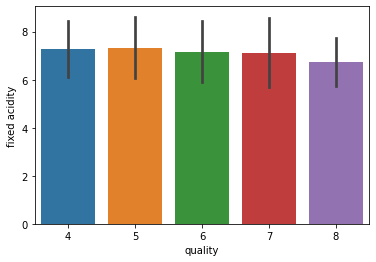

In [35]:
sns.barplot(data=pd_wine_data, x='quality', y='fixed acidity', ci="sd")

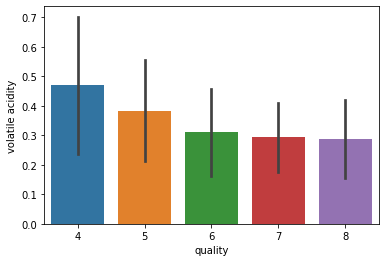

In [36]:
sns.barplot(data=pd_wine_data, x='quality', y='volatile acidity', ci="sd")

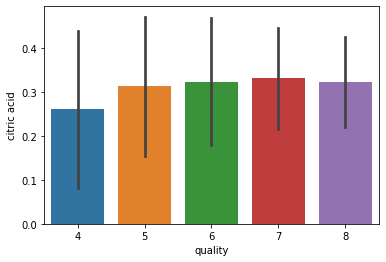

In [37]:
sns.barplot(data=pd_wine_data, x='quality', y='citric acid', ci="sd")

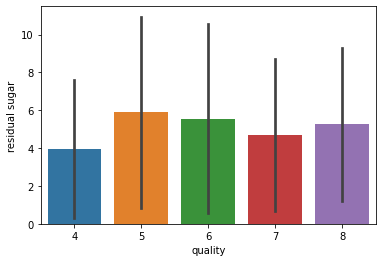

In [38]:
sns.barplot(data=pd_wine_data, x='quality', y='residual sugar', ci="sd")

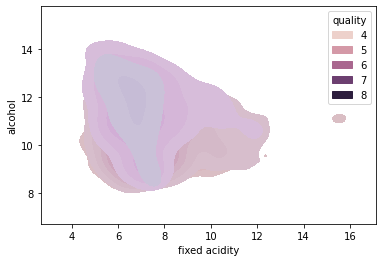

In [61]:
sns.kdeplot(data=pd_wine_data, x='fixed acidity', y='alcohol', hue='quality', shade=True)

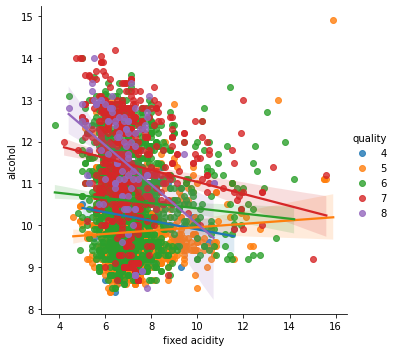

In [58]:
sns.lmplot(data=pd_wine_data, x='fixed acidity', y='alcohol', hue='quality')

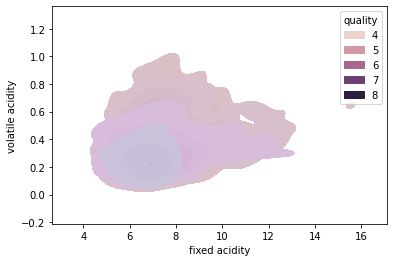

In [62]:
sns.kdeplot(data=pd_wine_data, x='fixed acidity', y='volatile acidity', hue='quality', shade=True)

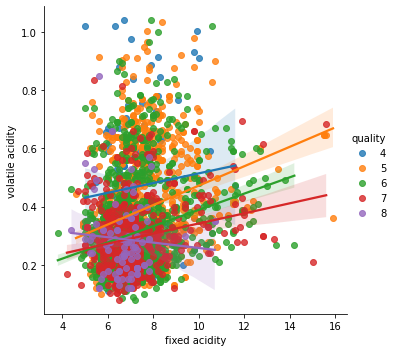

In [59]:
sns.lmplot(data=pd_wine_data, x='fixed acidity', y='volatile acidity', hue='quality')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)